<a href="https://colab.research.google.com/github/Rodrigoradzinski/Projeto-de-Circuitos-Digitais-Laborat-rio-e-Simula-o-IA--Predict_Match_World_Cups_2022-/blob/main/Trabalho_projeto_e_Circuitos_Digitais_(Inteligencia_Artificial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO BIBLIOTECAS**

In [204]:
#mportando duas bibliotecas para ser possível importar dados
from google.colab import files 
import io 
import numpy as np 
import glob
#realizado importação da biblioteca pandas para que seja possivel realizar o pre processamento dos dados.
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas
#realizado importação da biblioteca para reazlizar platagem de graficos
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pygments.token import String
from pandas.core.reshape.merge import string
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #padronizaçao
from sklearn.preprocessing import MinMaxScaler  #Normalização
from matplotlib.ticker import scale_range
from sklearn.model_selection import train_test_split  #treino
from sklearn.ensemble import RandomForestClassifier #Floresta aleatória
from sklearn.tree import DecisionTreeClassifier #Arvore de decisão
from sklearn import tree ##importei essa porque dava erro utilizando so a DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix ##para cria matriz de confusão
import os
import graphviz  ##desenhar arvorer de decisao
from graphviz.files import Source  ##mostra na tela a imagem
from sklearn.tree import export_graphviz  #permit salvar a arvore
from sklearn import tree  #permit salvar a arvore
from sklearn.metrics import classification_report #mostra relatorio como acuracia e f1 score
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression ##treino regreção linear
from sklearn.metrics import r2_score #mostra  f1 score
from sklearn.metrics import accuracy_score #mostra acuracy score
from scipy.stats import pearsonr



# **IMPORTAÇÃO OS DADOS**

In [205]:
#lendo arquivo
df = pd.read_csv("https://raw.githubusercontent.com/Rodrigoradzinski/Projeto-de-Circuitos-Digitais-Laborat-rio-e-Simula-o-IA--Predict_Match_World_Cups_2022-/main/WordCup_history_machs.csv")
#mostrando 5 primeiro registros
df.head() 
#mostrando 5 ultimos registros
df.tail()

,data_copa,time_a,time_b,placar,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,placar_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,vencedor_copa,sede_vencedor,qtd_times_parcticipantes
895,2018,Russia,Croatia,2Ð2,2,2,0,0,1,1,3Ð4,3,4,0,1,0,Russia,France,0,32
896,2018,France,Belgium,1Ð0,1,0,1,-1,0,0,0-0,0,0,1,0,0,Russia,France,0,32
897,2018,Croatia,England,2Ð1,2,1,1,-1,1,0,0-0,0,0,1,0,0,Russia,France,0,32
898,2018,Belgium,England,2Ð0,2,0,2,-2,0,0,0-0,0,0,1,0,0,Russia,France,0,32
899,2018,France,Croatia,4Ð2,4,2,2,-2,0,0,0-0,0,0,1,0,0,Russia,France,0,32


# **ANALISE EXPLORATÓRIA**

1.   visualizando Quantidade de Dados
2.   visualizando os dados
3.   Visualizando Quantidade de Jogos Mandante
4.   Visualizando Quantidade de Jogos Fora
5.   visualizando Tipos de Dados
6.   visualizando Meédias den algumas colunas



In [206]:
#itdentificando quantidade de linhas e colunas que existem em nossa base
df.shape

(900, 20)

In [207]:
#aqui estalos listados as colunas  para que possamos realizar o devido tratamento no nome da coluna
df.columns

Index(['data_copa', 'time_a', 'time_b', 'placar', 'gols_do_time_da_casa',
       'gols_do_time_da_fora', 'saldo_gols_do_time_da_casa',
       'saldo_gols_do_time_da_fora', 'teve_prorrogacao', 'foi_para_penaltis',
       'placar_penaltis', 'gols_do_time_da_casa_penaltis',
       'gols_do_time_da_fora_penaltis', 'time_da_casa_vencedor',
       'time_da_fora_vencedor', 'empatou', 'sede', 'vencedor_copa',
       'sede_vencedor', 'qtd_times_parcticipantes'],
      dtype='object')

In [208]:
#qtd de jogos mandante
item_counts = df["time_a"].value_counts()
item_counts = pd.DataFrame(item_counts)
item_counts

,time_a
Brazil,83
Argentina,58
Italy,56
West Germany,39
England,36
...,...
Norway,1
United Arab Emirates,1
Haiti,1
Wales,1


In [209]:
#qtd de jogos Fora
item_counts = df["time_b"].value_counts()
item_counts = pd.DataFrame(item_counts)
item_counts

,time_b
Mexico,39
England,33
France,33
Spain,30
Italy,27
...,...
Togo,1
Cuba,1
Iraq,1
Zaire,1


In [210]:
# Média da coluna
mediamarcados = df['gols_do_time_da_fora'].mean() 
mediasofridos = df['gols_do_time_da_casa'].mean() 
mediaempates = df['empatou'].mean() 
desvio = df['qtd_times_parcticipantes'].std() 
print("Desvio padrão qtd_times_parcticipantes ", desvio)
print("Média gols marcados ", mediamarcados)
print("Média gols sofridos", mediasofridos)
print("Média empates", mediaempates)

Desvio padrão qtd_times_parcticipantes  7.201884220418359
Média gols marcados  1.051111111111111
Média gols sofridos 1.78
Média empates 0.18777777777777777


In [211]:
# lendo estatiticas e  possivies outliers
df.describe()

,data_copa,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1986.915556,1.780000,1.051111,0.728889,-0.728889,0.075556,0.033333,0.113333,0.104444,0.570000,0.242222,0.187778,0.230000,24.522222
std,23.150270,1.604513,1.073313,1.930335,1.930335,0.264433,0.179605,0.648812,0.593047,0.495351,0.428666,0.390752,0.421066,7.201884
min,1930.000000,0.000000,0.000000,-7.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,1970.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
50%,1990.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000
75%,2006.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000
max,2018.000000,10.000000,7.000000,9.000000,7.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,32.000000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   data_copa                      900 non-null    int64 
 1   time_a                         900 non-null    object
 2   time_b                         900 non-null    object
 3   placar                         900 non-null    object
 4   gols_do_time_da_casa           900 non-null    int64 
 5   gols_do_time_da_fora           900 non-null    int64 
 6   saldo_gols_do_time_da_casa     900 non-null    int64 
 7   saldo_gols_do_time_da_fora     900 non-null    int64 
 8   teve_prorrogacao               900 non-null    int64 
 9   foi_para_penaltis              900 non-null    int64 
 10  placar_penaltis                900 non-null    object
 11  gols_do_time_da_casa_penaltis  900 non-null    int64 
 12  gols_do_time_da_fora_penaltis  900 non-null    int64 
 13  time_

In [213]:
#verificando se existem  valores nulos
print(df.isna().sum())

data_copa                        0
time_a                           0
time_b                           0
placar                           0
gols_do_time_da_casa             0
gols_do_time_da_fora             0
saldo_gols_do_time_da_casa       0
saldo_gols_do_time_da_fora       0
teve_prorrogacao                 0
foi_para_penaltis                0
placar_penaltis                  0
gols_do_time_da_casa_penaltis    0
gols_do_time_da_fora_penaltis    0
time_da_casa_vencedor            0
time_da_fora_vencedor            0
empatou                          0
sede                             0
vencedor_copa                    0
sede_vencedor                    0
qtd_times_parcticipantes         0
dtype: int64


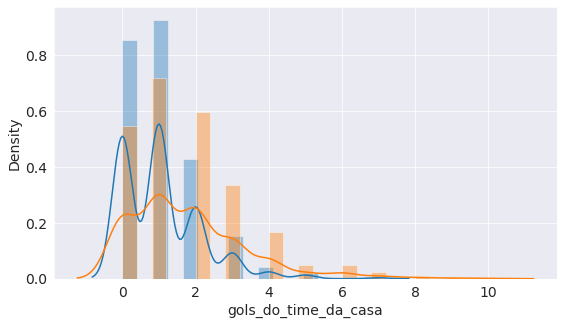

In [214]:
#analisando graficamente os gols fora e gols em casa no mesmo gráfico
sns.distplot(df['gols_do_time_da_fora']);
sns.distplot(df['gols_do_time_da_casa']);

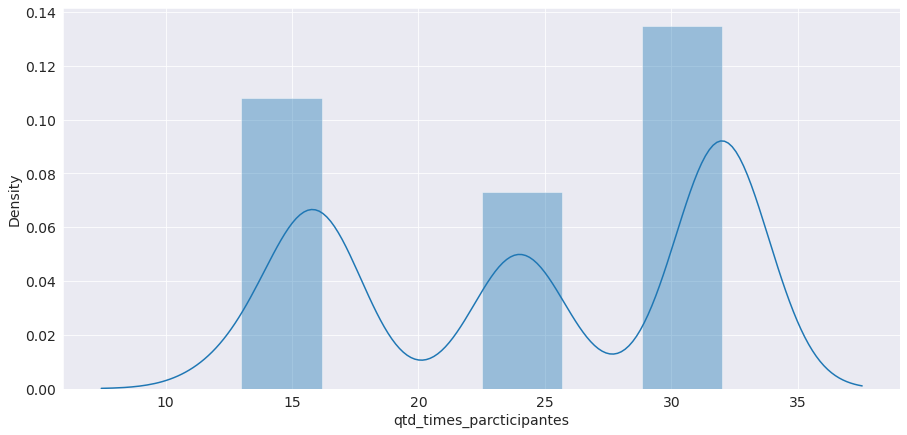

In [216]:
#indetificado que a coluna   qtd_times_parcticipantes pois pelo que tudo indica atraves do describe esta  muito fora do padrão e um outlier
figs, axs = plt.subplots(nrows =1, ncols =1 ,figsize=(15, 7) )

sns.distplot(df['qtd_times_parcticipantes']);


In [217]:
#Criando uma coluna com total de Gols
df['TotalGols'] = df['gols_do_time_da_fora'] + df['gols_do_time_da_casa']


In [218]:
df

,data_copa,time_a,time_b,placar,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,...,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,vencedor_copa,sede_vencedor,qtd_times_parcticipantes,TotalGols
0,1930,France,Mexico,4Ð1,4,1,3,-3,0,0,...,0,0,1,0,0,Uruguay,Uruguay,1,13,5
1,1930,United States,Belgium,3Ð0,3,0,3,-3,0,0,...,0,0,1,0,0,Uruguay,Uruguay,1,13,3
2,1930,Yugoslavia,Brazil,2Ð1,2,1,1,-1,0,0,...,0,0,1,0,0,Uruguay,Uruguay,1,13,3
3,1930,Romania,Peru,3Ð1,3,1,2,-2,0,0,...,0,0,1,0,0,Uruguay,Uruguay,1,13,4
4,1930,Argentina,France,1Ð0,1,0,1,-1,0,0,...,0,0,1,0,0,Uruguay,Uruguay,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Croatia,2Ð2,2,2,0,0,1,1,...,3,4,0,1,0,Russia,France,0,32,4
896,2018,France,Belgium,1Ð0,1,0,1,-1,0,0,...,0,0,1,0,0,Russia,France,0,32,1
897,2018,Croatia,England,2Ð1,2,1,1,-1,1,0,...,0,0,1,0,0,Russia,France,0,32,3
898,2018,Belgium,England,2Ð0,2,0,2,-2,0,0,...,0,0,1,0,0,Russia,France,0,32,2


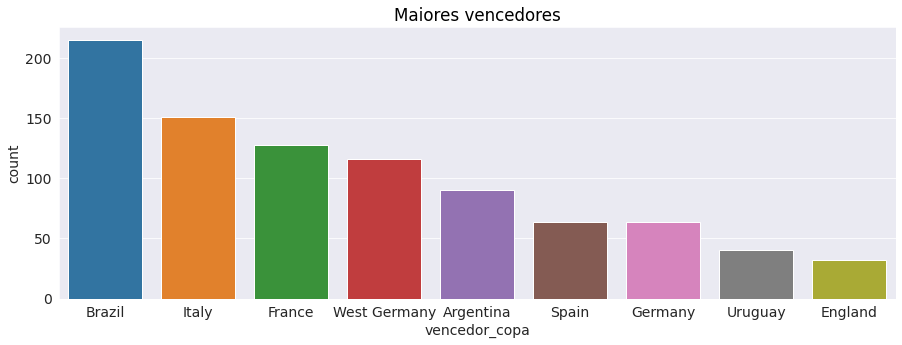

In [219]:
# pltando gráfico Maiores campeões
plt.figure(figsize=(15,5))
sns.countplot(x='vencedor_copa', data=df, order=df['vencedor_copa'].value_counts().index)
plt.title("Maiores vencedores",color='black')
plt.show()

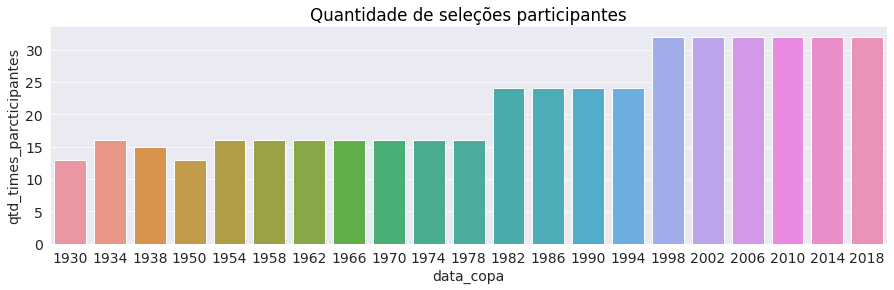

In [220]:
# quantidade de Times Participantes por ano (Seleções participantes)
plt.figure(figsize=(15,4))
sns.barplot(x='data_copa',y='qtd_times_parcticipantes', data=df)
plt.title("Quantidade de seleções participantes",color='black')
plt.show()

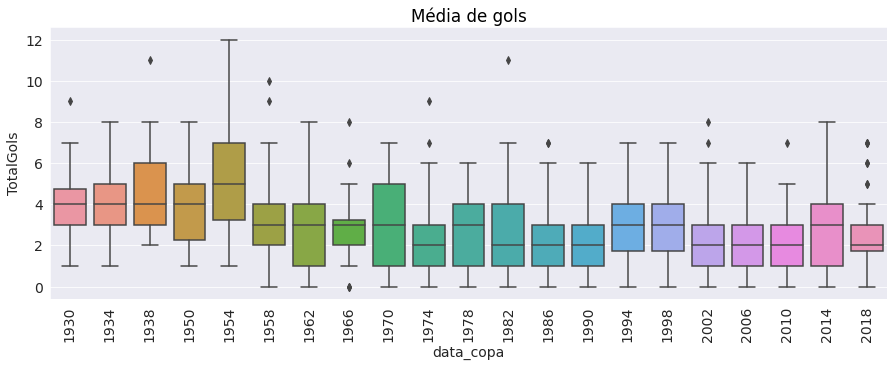

In [221]:
# Média de gols por ano na historia das copa do mundos
plt.figure(figsize=(15,5))
sns.boxplot(df['data_copa'], df['TotalGols'])
plt.title("Média de gols",color='black')
plt.xticks(rotation=90)
plt.show()

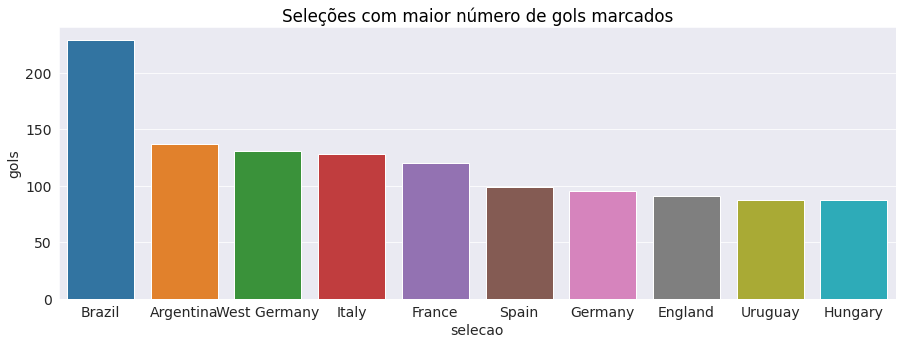

In [222]:
# mostrando total de gols por seleção
gols_casa = df.groupby("time_a")["gols_do_time_da_casa"].sum().reset_index()
gols_casa.columns = ["selecao","gols"]
gols_fora = df.groupby("time_b")["gols_do_time_da_fora"].sum().reset_index()
gols_fora.columns = ["selecao","gols"]
gols = pd.concat([gols_casa, gols_fora],axis=0)
gols = gols.groupby("selecao")["gols"].sum().reset_index()
gols = gols.sort_values(by="gols",ascending =False)
gols["gols"] = gols["gols"].astype(int)
plt.figure(figsize=(15,5))
sns.barplot(x="selecao",y="gols", data=gols[:10])
plt.title("Seleções com maior número de gols marcados",color='black')
plt.show()


# **PRÉ PROCESSAMENTO**

In [223]:
#padronizando deixando todas as colunas minusculo
df.columns.str.lower()

Index(['data_copa', 'time_a', 'time_b', 'placar', 'gols_do_time_da_casa',
       'gols_do_time_da_fora', 'saldo_gols_do_time_da_casa',
       'saldo_gols_do_time_da_fora', 'teve_prorrogacao', 'foi_para_penaltis',
       'placar_penaltis', 'gols_do_time_da_casa_penaltis',
       'gols_do_time_da_fora_penaltis', 'time_da_casa_vencedor',
       'time_da_fora_vencedor', 'empatou', 'sede', 'vencedor_copa',
       'sede_vencedor', 'qtd_times_parcticipantes', 'totalgols'],
      dtype='object')

In [224]:
#agora irei realizar uma pre selecao dos dados excluindo  as colunas que nao vou precisar inicialmente usando comando drop 
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('placar', axis=1, inplace=True)  
df.drop('placar_penaltis', axis=1, inplace=True)  

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   data_copa                      900 non-null    int64 
 1   time_a                         900 non-null    object
 2   time_b                         900 non-null    object
 3   gols_do_time_da_casa           900 non-null    int64 
 4   gols_do_time_da_fora           900 non-null    int64 
 5   saldo_gols_do_time_da_casa     900 non-null    int64 
 6   saldo_gols_do_time_da_fora     900 non-null    int64 
 7   teve_prorrogacao               900 non-null    int64 
 8   foi_para_penaltis              900 non-null    int64 
 9   gols_do_time_da_casa_penaltis  900 non-null    int64 
 10  gols_do_time_da_fora_penaltis  900 non-null    int64 
 11  time_da_casa_vencedor          900 non-null    int64 
 12  time_da_fora_vencedor          900 non-null    int64 
 13  empat

In [226]:
# **INSERINDO COLUNA E SEPARANDO ALGUNS DADOS**
#aqui estou renomeando alguns dados para ficar mais compreensível 
df.columns = df.columns.str.replace('[#,@,&,$,-,+,/,*]', '') 
df['vencedor_copa']=df['vencedor_copa'].str.replace('West Germany','Germany') 
#print("\n\n", dados)
#Adicionando minha coluna Target minha class que significara se o brasil venceu a copa estara = 1 mais abaixo estou fazendo essa alteraçao
df.insert(19,'brasil_vence','0')

In [227]:
df

,data_copa,time_a,time_b,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,vencedor_copa,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence
0,1930,France,Mexico,4,1,3,-3,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,5,0
1,1930,United States,Belgium,3,0,3,-3,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,3,0
2,1930,Yugoslavia,Brazil,2,1,1,-1,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,3,0
3,1930,Romania,Peru,3,1,2,-2,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,4,0
4,1930,Argentina,France,1,0,1,-1,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Croatia,2,2,0,0,1,1,3,4,0,1,0,Russia,France,0,32,4,0
896,2018,France,Belgium,1,0,1,-1,0,0,0,0,1,0,0,Russia,France,0,32,1,0
897,2018,Croatia,England,2,1,1,-1,1,0,0,0,1,0,0,Russia,France,0,32,3,0
898,2018,Belgium,England,2,0,2,-2,0,0,0,0,1,0,0,Russia,France,0,32,2,0


In [228]:
# **CRIANDO MINHA CLASSE**
#aqui estou pegando unicos paises que venceram a copa para ter certeza que esta correto  ) 
#deve retornar ['Argentina' 'Brazil' 'England' 'France' 'Germany' 'Italy' 'Spain' 'Uruguay']
Row_list =[]
for index, rows in df.iterrows():
    my_list =[rows.vencedor_copa]
    Row_list.append(my_list)
listaselecao=(np.unique(Row_list))
print(listaselecao)

['Argentina' 'Brazil' 'England' 'France' 'Germany' 'Italy' 'Spain'
 'Uruguay']


In [229]:
#Aqqui criei uma um for para setar valores para seleção selecao brasil = 1 caso tenha mais de um pais
#e queira setar um nome para cada da  para se usar esse meu for (e desenecessário quando so que alter alpera um valor para um  pais especifico)
df['brasil_vence']= 0
elemento = 'Brazil'
print (listaselecao)
for elemento in ('Brazil'):
  df.loc[df['vencedor_copa'].str.contains('Brazil') ,'brasil_vence']=1
  campeoes=(f"Valor= 1 | >> para Seleção do = Brazil = 1 e  0 para as demais")
campeoes

['Argentina' 'Brazil' 'England' 'France' 'Germany' 'Italy' 'Spain'
 'Uruguay']


'Valor= 1 | >> para Seleção do = Brazil = 1 e  0 para as demais'

In [230]:
df

,data_copa,time_a,time_b,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,vencedor_copa,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence
0,1930,France,Mexico,4,1,3,-3,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,5,0
1,1930,United States,Belgium,3,0,3,-3,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,3,0
2,1930,Yugoslavia,Brazil,2,1,1,-1,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,3,0
3,1930,Romania,Peru,3,1,2,-2,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,4,0
4,1930,Argentina,France,1,0,1,-1,0,0,0,0,1,0,0,Uruguay,Uruguay,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Croatia,2,2,0,0,1,1,3,4,0,1,0,Russia,France,0,32,4,0
896,2018,France,Belgium,1,0,1,-1,0,0,0,0,1,0,0,Russia,France,0,32,1,0
897,2018,Croatia,England,2,1,1,-1,1,0,0,0,1,0,0,Russia,France,0,32,3,0
898,2018,Belgium,England,2,0,2,-2,0,0,0,0,1,0,0,Russia,France,0,32,2,0


In [231]:
#aqui criei um group by para  analisar melhor
groups = df.groupby(['vencedor_copa', 'brasil_vence']).count().head(10)
groupsorder = groups.sort_values(['gols_do_time_da_casa', 'brasil_vence'],ascending=False)
groupsorder 


,,data_copa,time_a,time_b,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,sede_vencedor,qtd_times_parcticipantes,TotalGols
vencedor_copa,brasil_vence,,,,,,,,,,,,,,,,,,
Brazil,1,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215
Germany,0,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
Italy,0,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
France,0,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
Argentina,0,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
Spain,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Uruguay,0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
England,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [232]:
#nesta etapa estou verificando quantos valors nulos existem em miunhas colunas som para te uma ideia utilizei comando print(df.isna().sum())
#nesta estou  utilizando o comando  info para descrobri quais e os tipos de dados que estou trabalhando  df.info() para depois futuramente formatar esse dados para que  seja possivek realizar uma minaração adequadad
#como esta tudo no padrao que quero trabalhar estou indo para proxima estapa
print(df.isna().sum())


data_copa                        0
time_a                           0
time_b                           0
gols_do_time_da_casa             0
gols_do_time_da_fora             0
saldo_gols_do_time_da_casa       0
saldo_gols_do_time_da_fora       0
teve_prorrogacao                 0
foi_para_penaltis                0
gols_do_time_da_casa_penaltis    0
gols_do_time_da_fora_penaltis    0
time_da_casa_vencedor            0
time_da_fora_vencedor            0
empatou                          0
sede                             0
vencedor_copa                    0
sede_vencedor                    0
qtd_times_parcticipantes         0
TotalGols                        0
brasil_vence                     0
dtype: int64


In [233]:
#**TRATAMENTO DE VALORES NULL**
##aqui so esportei minha tabela para abri no excel e analisar a
df.to_csv("WordCup_history_machs_backup.csv", encoding = 'utf-8')
##aqui mudei para 0 todos os valores Nan NULL para 0
df.fillna(value = 0,  
          inplace = True)



In [234]:
# **TRATAMENTO DE TIPOS DE DADOS**
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   data_copa                      900 non-null    int64 
 1   time_a                         900 non-null    object
 2   time_b                         900 non-null    object
 3   gols_do_time_da_casa           900 non-null    int64 
 4   gols_do_time_da_fora           900 non-null    int64 
 5   saldo_gols_do_time_da_casa     900 non-null    int64 
 6   saldo_gols_do_time_da_fora     900 non-null    int64 
 7   teve_prorrogacao               900 non-null    int64 
 8   foi_para_penaltis              900 non-null    int64 
 9   gols_do_time_da_casa_penaltis  900 non-null    int64 
 10  gols_do_time_da_fora_penaltis  900 non-null    int64 
 11  time_da_casa_vencedor          900 non-null    int64 
 12  time_da_fora_vencedor          900 non-null    int64 
 13  empat

In [235]:
df['gols_do_time_da_casa'] = df['gols_do_time_da_casa'].astype(int)
df['gols_do_time_da_fora'] = df['gols_do_time_da_fora'].astype(int)
df['saldo_gols_do_time_da_casa'] = df['saldo_gols_do_time_da_casa'].astype(int)
df['saldo_gols_do_time_da_fora'] = df['saldo_gols_do_time_da_fora'].astype(int)
df['teve_prorrogacao'] = df['teve_prorrogacao'].astype(int)
df['foi_para_penaltis'] = df['foi_para_penaltis'].astype(int)
df['gols_do_time_da_casa_penaltis'] = df['gols_do_time_da_casa_penaltis'].astype(int)
df['gols_do_time_da_fora_penaltis'] = df['gols_do_time_da_fora_penaltis'].astype(int)
df['time_da_casa_vencedor'] = df['time_da_casa_vencedor'].astype(int)
df['time_da_fora_vencedor'] = df['time_da_fora_vencedor'].astype(int)
df['empatou'] = df['empatou'].astype(int)
df['sede_vencedor'] = df['sede_vencedor'].astype(int)
df['empatou'] = df['empatou'].astype(int)
df[' qtd_times_parcticipantes'] = df['qtd_times_parcticipantes'].astype(int)



In [236]:
# **CRIANDO UMA MATRIZ DE CORRELAÇÃO**
#estou importanto algums blibliotecas para realizar alguma analise exploratoria
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

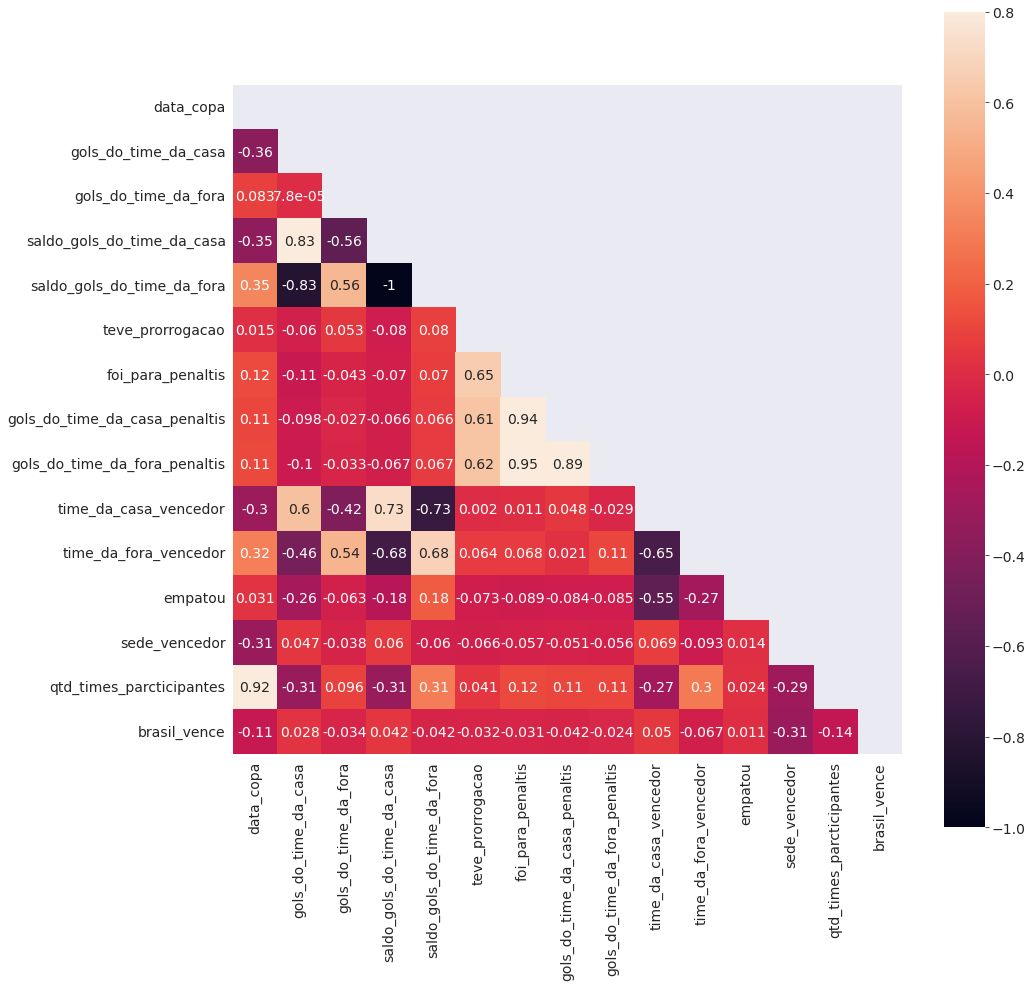

In [237]:
raw_data=['data_copa', 'time_a', 'time_b', 'gols_do_time_da_casa',
       'gols_do_time_da_fora', 'saldo_gols_do_time_da_casa',
       'saldo_gols_do_time_da_fora', 'teve_prorrogacao', 'foi_para_penaltis',
       'gols_do_time_da_casa_penaltis', 'gols_do_time_da_fora_penaltis',
       'time_da_casa_vencedor', 'time_da_fora_vencedor', 'empatou', 'sede',
       'vencedor_copa', 'sede_vencedor', 'qtd_times_parcticipantes',
       'brasil_vence']

# Aqui podemos ver a correlçao dos dados um com os outros 
# quanto mais perto de 1 mais elas se correlacionan[
#exemplo perc_gols_assis_minutes tem uma relacao muito forte com perc_gols_min
#exemplo qtd__minutos_jogados   tem um correlacao com a qts_ini_joganso
corrmat = df[raw_data].corr()
#setamos dimensão do meu grafico
fig = plt.figure(figsize = (15, 15))
#ajust gráfico
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

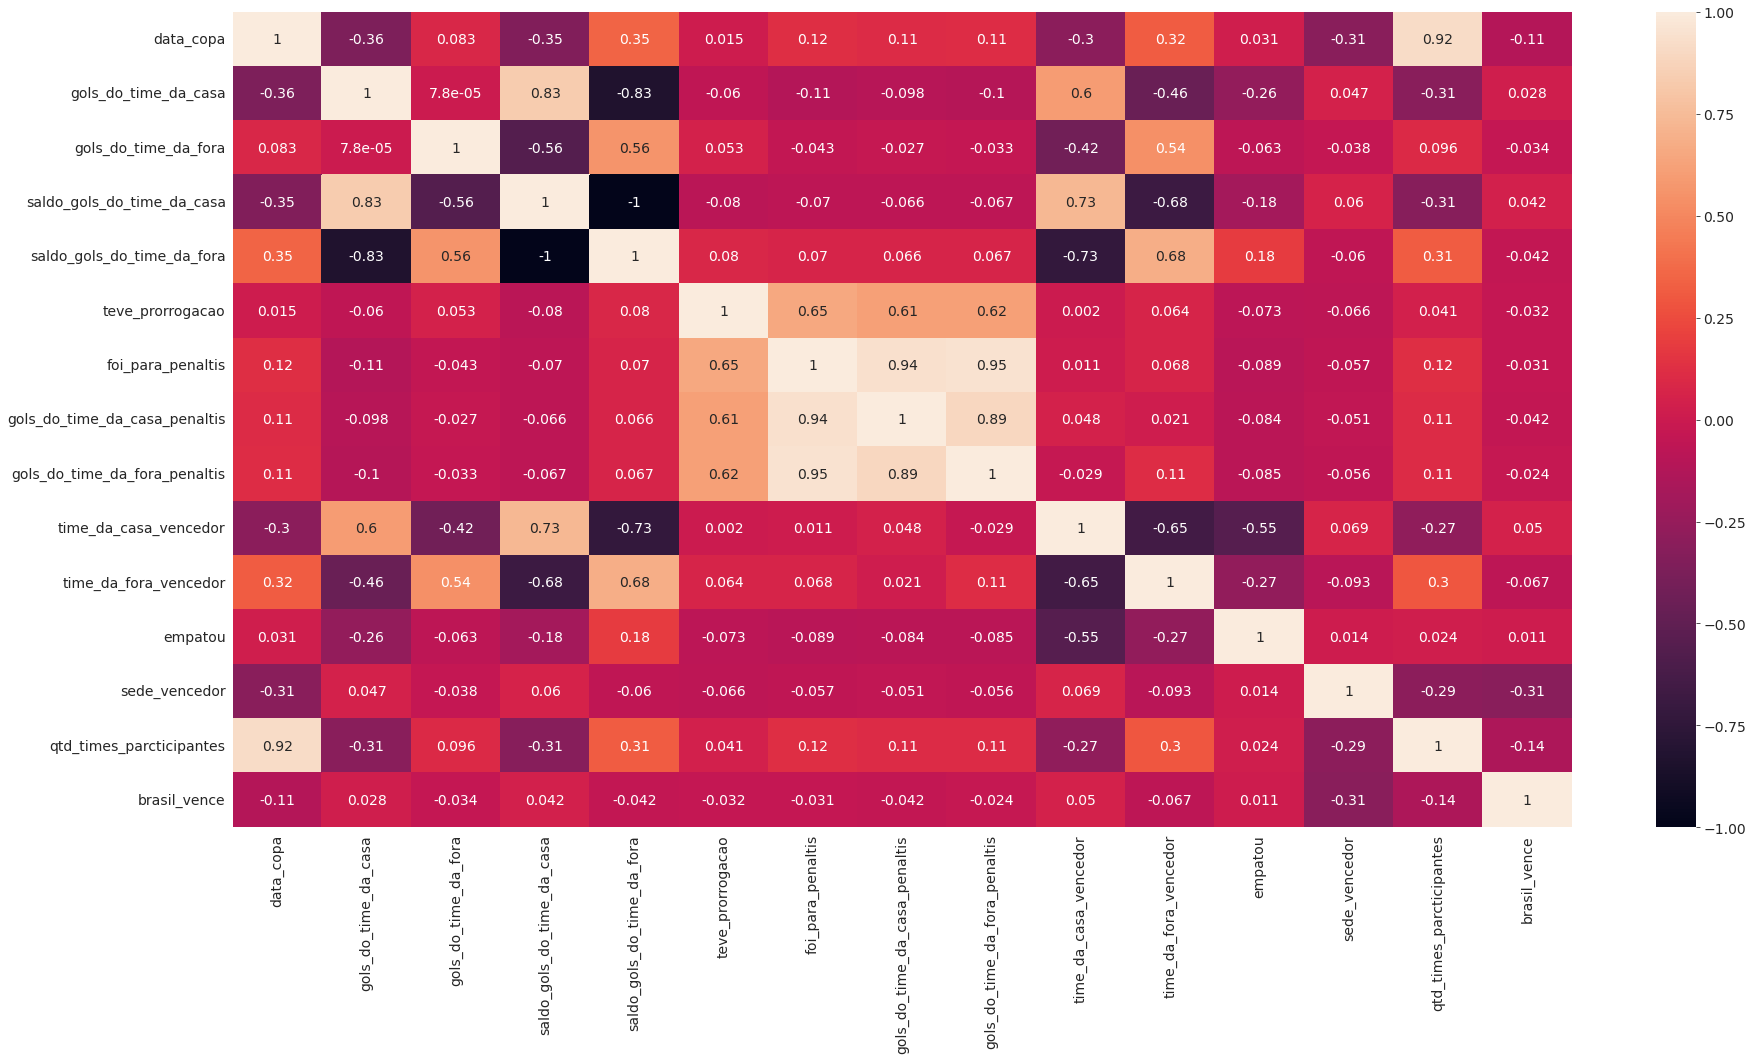

In [238]:
#outro grafico mostrando outra correlaçao
plt.figure(figsize=(30,15))
changelist=['data_copa', 'time_a', 'time_b', 'gols_do_time_da_casa',
       'gols_do_time_da_fora', 'saldo_gols_do_time_da_casa',
       'saldo_gols_do_time_da_fora', 'teve_prorrogacao', 'foi_para_penaltis',
       'gols_do_time_da_casa_penaltis', 'gols_do_time_da_fora_penaltis',
       'time_da_casa_vencedor', 'time_da_fora_vencedor', 'empatou', 'sede',
       'vencedor_copa', 'sede_vencedor', 'qtd_times_parcticipantes',
       'brasil_vence']
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [239]:
df

,data_copa,time_a,time_b,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,...,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede,vencedor_copa,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,1930,France,Mexico,4,1,3,-3,0,0,0,...,1,0,0,Uruguay,Uruguay,1,13,5,0,13
1,1930,United States,Belgium,3,0,3,-3,0,0,0,...,1,0,0,Uruguay,Uruguay,1,13,3,0,13
2,1930,Yugoslavia,Brazil,2,1,1,-1,0,0,0,...,1,0,0,Uruguay,Uruguay,1,13,3,0,13
3,1930,Romania,Peru,3,1,2,-2,0,0,0,...,1,0,0,Uruguay,Uruguay,1,13,4,0,13
4,1930,Argentina,France,1,0,1,-1,0,0,0,...,1,0,0,Uruguay,Uruguay,1,13,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Croatia,2,2,0,0,1,1,3,...,0,1,0,Russia,France,0,32,4,0,32
896,2018,France,Belgium,1,0,1,-1,0,0,0,...,1,0,0,Russia,France,0,32,1,0,32
897,2018,Croatia,England,2,1,1,-1,1,0,0,...,1,0,0,Russia,France,0,32,3,0,32
898,2018,Belgium,England,2,0,2,-2,0,0,0,...,1,0,0,Russia,France,0,32,2,0,32


In [240]:
# **SEPARANDO OS DADOS DE INTERESSE** 
#Selecionando os dados que vou trabalhar em um novo dataframe chamado  dfwork
#dfwork['Brasil_Vence'] = dfwork['Brasil_Vence'].astype(int) #Aqui cometi um erro a classe deve ser categorica  ou seja nao aceita valores FLoat entaon converti para inteiro
dfwork =df.drop(['time_a', 'time_b','sede','vencedor_copa','data_copa'], axis=1)
dfwork
headers = dfwork.columns
df.columns.str.lower()


Index(['data_copa', 'time_a', 'time_b', 'gols_do_time_da_casa',
       'gols_do_time_da_fora', 'saldo_gols_do_time_da_casa',
       'saldo_gols_do_time_da_fora', 'teve_prorrogacao', 'foi_para_penaltis',
       'gols_do_time_da_casa_penaltis', 'gols_do_time_da_fora_penaltis',
       'time_da_casa_vencedor', 'time_da_fora_vencedor', 'empatou', 'sede',
       'vencedor_copa', 'sede_vencedor', 'qtd_times_parcticipantes',
       'totalgols', 'brasil_vence', ' qtd_times_parcticipantes'],
      dtype='object')

In [241]:
dfwork

,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,4,1,3,-3,0,0,0,0,1,0,0,1,13,5,0,13
1,3,0,3,-3,0,0,0,0,1,0,0,1,13,3,0,13
2,2,1,1,-1,0,0,0,0,1,0,0,1,13,3,0,13
3,3,1,2,-2,0,0,0,0,1,0,0,1,13,4,0,13
4,1,0,1,-1,0,0,0,0,1,0,0,1,13,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,2,0,0,1,1,3,4,0,1,0,0,32,4,0,32
896,1,0,1,-1,0,0,0,0,1,0,0,0,32,1,0,32
897,2,1,1,-1,1,0,0,0,1,0,0,0,32,3,0,32
898,2,0,2,-2,0,0,0,0,1,0,0,0,32,2,0,32


# **UTILIZAR ESTE PARA TESTE PADRONIZAÇÃO DOS DADOS** 

In [242]:
namecolumns= dfwork.columns

In [243]:
#aqui so peqguei  montei um array para usar ali em baixo do para  facilitar
namecolumns=list(dfwork)#.iloc[:,1:-1])
##aplicando metedo StandardScaler().fit(dfwork) para padronização dos dados
df_padronizacao =StandardScaler().fit(dfwork)

In [244]:
##tranformando os dados em si
dfpadronizado = df_padronizacao.transform(dfwork)

In [245]:
namecolumns

['gols_do_time_da_casa',
 'gols_do_time_da_fora',
 'saldo_gols_do_time_da_casa',
 'saldo_gols_do_time_da_fora',
 'teve_prorrogacao',
 'foi_para_penaltis',
 'gols_do_time_da_casa_penaltis',
 'gols_do_time_da_fora_penaltis',
 'time_da_casa_vencedor',
 'time_da_fora_vencedor',
 'empatou',
 'sede_vencedor',
 'qtd_times_parcticipantes',
 'TotalGols',
 'brasil_vence',
 ' qtd_times_parcticipantes']

In [246]:
df_padronizado = pd.DataFrame(dfpadronizado)
#renomendo as colunas novamente 
df_padronizado.columns = [namecolumns]


In [247]:
df_padronizado

,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,1.384367,-0.047646,1.177191,-1.177191,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,1.829707,-1.600780,1.124126,-0.56024,-1.600780
1,0.760778,-0.979859,1.177191,-1.177191,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,1.829707,-1.600780,0.087534,-0.56024,-1.600780
2,0.137190,-0.047646,0.140526,-0.140526,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,1.829707,-1.600780,0.087534,-0.56024,-1.600780
3,0.760778,-0.047646,0.658859,-0.658859,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,1.829707,-1.600780,0.605830,-0.56024,-1.600780
4,-0.486399,-0.979859,0.140526,-0.140526,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,1.829707,-1.600780,-0.949057,-0.56024,-1.600780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.137190,0.884566,-0.377807,0.377807,3.497899,5.385165,4.451633,6.572369,-1.151339,1.768740,-0.480822,-0.546536,1.038886,0.605830,-0.56024,1.038886
896,-0.486399,-0.979859,0.140526,-0.140526,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,-0.546536,1.038886,-0.949057,-0.56024,1.038886
897,0.137190,-0.047646,0.140526,-0.140526,3.497899,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,-0.546536,1.038886,0.087534,-0.56024,1.038886
898,0.137190,-0.979859,0.658859,-0.658859,-0.285886,-0.185695,-0.174775,-0.176213,0.868554,-0.565374,-0.480822,-0.546536,1.038886,-0.430761,-0.56024,1.038886


In [ ]:
dfpadronizado

```
```


---


# GRAFICOS QUEM MOSTRAM ANTES E DEPOIS DA PADRONIZAÇÃO
```
```


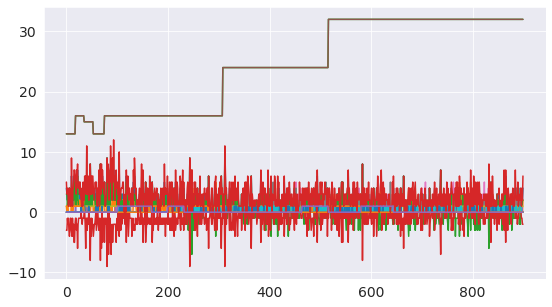

In [248]:
#mostra grafico de como dados ficaram antes de pois de Padronizado
#<ANTES>
scalerantes = StandardScaler()  
scalerantes.fit(dfwork)
dftrans = scalerantes.transform(dfwork)
plt.plot(dfwork);
#plt.show(dfwork)


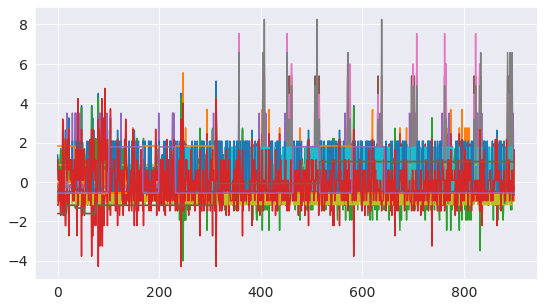

In [249]:
#<DEPOIS>
scalerdepois = StandardScaler()  
scalerdepois.fit(dfpadronizado)
dftrans = scalerdepois.transform(dfpadronizado)
plt.plot(dfpadronizado);


# **UTILIZAR ESTE PARA TESTE NORMALIZAÇÃO**


In [250]:
dfwork

,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,4,1,3,-3,0,0,0,0,1,0,0,1,13,5,0,13
1,3,0,3,-3,0,0,0,0,1,0,0,1,13,3,0,13
2,2,1,1,-1,0,0,0,0,1,0,0,1,13,3,0,13
3,3,1,2,-2,0,0,0,0,1,0,0,1,13,4,0,13
4,1,0,1,-1,0,0,0,0,1,0,0,1,13,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,2,0,0,1,1,3,4,0,1,0,0,32,4,0,32
896,1,0,1,-1,0,0,0,0,1,0,0,0,32,1,0,32
897,2,1,1,-1,1,0,0,0,1,0,0,0,32,3,0,32
898,2,0,2,-2,0,0,0,0,1,0,0,0,32,2,0,32


In [251]:
#aqui so peqguei  montei um array para usar ali em baixo do para  facilitar
namecolumns=list(dfwork.columns)
##aplicando metedo MinMaxScaler().fit(dfwork) para Normalização  dos dados
df_normalizacao = MinMaxScaler().fit(dfwork)
df_normalizado = df_normalizacao.transform(dfwork)

In [252]:
df_normalizado = pd.DataFrame(df_normalizado)
#renomendo as colunas novamente 


In [253]:
df_normalizado.columns = [namecolumns]

In [254]:
#df_normalizado['selecao_id_target'] = df_normalizado['selecao_id_target'].astype(int) #Aqui cometi um erro a classe deve ser categorica  ou seja nao aceita valores FLoat entaon converti para inteiro
df_normalizado['brasil_vence'] = df_normalizado['brasil_vence'].astype(int)
df_normalizado


,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,0.4,0.142857,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.416667,0,0.0
1,0.3,0.000000,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000,0,0.0
2,0.2,0.142857,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000,0,0.0
3,0.3,0.142857,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.333333,0,0.0
4,0.1,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.083333,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.2,0.285714,0.4375,0.5625,1.0,1.0,0.6,0.8,0.0,1.0,0.0,0.0,1.0,0.333333,0,1.0
896,0.1,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.083333,0,1.0
897,0.2,0.142857,0.5000,0.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.250000,0,1.0
898,0.2,0.000000,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.166667,0,1.0


```
```


---


# GRAFICOS QUEM MOSTRAM ANTES E DEPOIS DA NORMALIZAÇÃO
```
```



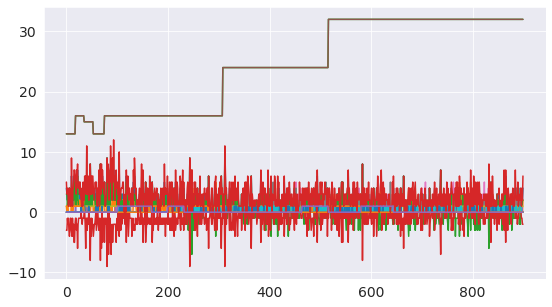

In [255]:
#mostra grafico de como dados ficaram antes de pois de Padronizado
#<ANTES>
scalerantes = StandardScaler()  
scalerantes.fit(dfwork)
dftrans = scalerantes.transform(dfwork)
plt.plot(dfwork);
#plt.show(dfwork)

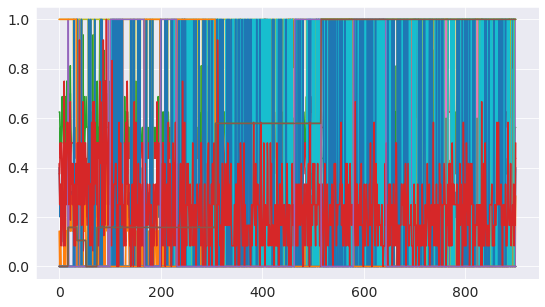

In [256]:
#<DEPOIS>
scalerdepois = StandardScaler()  
scalerdepois.fit(df_normalizado)
dftrans = scalerdepois.transform(df_normalizado)
plt.plot(df_normalizado);

# **PROCESSAMENTO**


PADRAO ESTA UTILIZANDO DADOS NORMALIZADOS
---




In [257]:
df_normalizado

,gols_do_time_da_casa,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols,brasil_vence,qtd_times_parcticipantes
0,0.4,0.142857,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.416667,0,0.0
1,0.3,0.000000,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000,0,0.0
2,0.2,0.142857,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000,0,0.0
3,0.3,0.142857,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.333333,0,0.0
4,0.1,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.083333,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.2,0.285714,0.4375,0.5625,1.0,1.0,0.6,0.8,0.0,1.0,0.0,0.0,1.0,0.333333,0,1.0
896,0.1,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.083333,0,1.0
897,0.2,0.142857,0.5000,0.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.250000,0,1.0
898,0.2,0.000000,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.166667,0,1.0


In [258]:
#Selecionado nossa coluna alvo que seria id da selecão nosa classe nosso objetico e ver se o algoritimo sabe quem e Brazil
#pegando features dados normalizado
#>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<
dfwork_x =df_normalizado.iloc[:,1:-2]
dfwork_y =df.iloc[:,-2]
#>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<
#dfwork_x =df_padronizado.iloc[:,1:-1]
#dfwork_y =df_padronizado.iloc[:,-1]
#>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<
#dfwork_x =dfwork.iloc[:,1:-1]
#dfwork_y =dfwork.iloc[:,-1]
#>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<


In [259]:
dfwork_x

,gols_do_time_da_fora,saldo_gols_do_time_da_casa,saldo_gols_do_time_da_fora,teve_prorrogacao,foi_para_penaltis,gols_do_time_da_casa_penaltis,gols_do_time_da_fora_penaltis,time_da_casa_vencedor,time_da_fora_vencedor,empatou,sede_vencedor,qtd_times_parcticipantes,TotalGols
0,0.142857,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.416667
1,0.000000,0.6250,0.3750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000
2,0.142857,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.250000
3,0.142857,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.333333
4,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.285714,0.4375,0.5625,1.0,1.0,0.6,0.8,0.0,1.0,0.0,0.0,1.0,0.333333
896,0.000000,0.5000,0.5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.083333
897,0.142857,0.5000,0.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.250000
898,0.000000,0.5625,0.4375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.166667


In [260]:
dfwork_y

0      0
1      0
2      0
3      0
4      0
      ..
895    0
896    0
897    0
898    0
899    0
Name: brasil_vence, Length: 900, dtype: int64

# **1 MODELO - COM ARVORE DE DECISÃO**

In [261]:
x_treino , x_teste , y_treino, y_teste =train_test_split(
          dfwork_x,
          dfwork_y,
          test_size =0.25,
          random_state=10
)

In [262]:
#criando modelo 
#profundidade da arvore ou
#max_depth=3 NUMERO DE RAMIFICAÇÕES
df_DecisionTree = tree.DecisionTreeClassifier( max_depth=5,random_state= 10 )#max_depth=5,random_state= 31

In [263]:
#aqui estou usando um recuros chamado  feature_importances_  retorna os atributos mais importantes
df_DecisionTree= df_DecisionTree.fit(x_treino,y_treino)
df_DecisionTree.feature_importances_
for feature,importancia in zip(dfwork.columns,df_DecisionTree.feature_importances_):
  print("{}:{}".format(feature,importancia))

gols_do_time_da_casa:0.008504641966897557
gols_do_time_da_fora:0.005687869465334151
saldo_gols_do_time_da_casa:0.02972810548524499
saldo_gols_do_time_da_fora:0.0
teve_prorrogacao:0.0
foi_para_penaltis:0.0
gols_do_time_da_casa_penaltis:0.0
gols_do_time_da_fora_penaltis:0.0
time_da_casa_vencedor:0.0
time_da_fora_vencedor:0.009861434742297507
empatou:0.22821394445705553
sede_vencedor:0.6431856916891685
qtd_times_parcticipantes:0.07481831219400176


In [264]:
text_representation = tree.export_text(df_DecisionTree)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_11 <= 0.37
|   |   |--- feature_11 <= 0.13
|   |   |   |--- class: 0
|   |   |--- feature_11 >  0.13
|   |   |   |--- feature_12 <= 0.38
|   |   |   |   |--- feature_1 <= 0.47
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.47
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  0.38
|   |   |   |   |--- feature_2 <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.19
|   |   |   |   |   |--- class: 1
|   |--- feature_11 >  0.37
|   |   |--- feature_11 <= 0.79
|   |   |   |--- feature_12 <= 0.21
|   |   |   |   |--- feature_0 <= 0.21
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.21
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  0.21
|   |   |   |   |--- feature_12 <= 0.46
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_12 >  0.46
|   |   |   |   |   |--- class: 0
|   |   |--- feature_11 >  0.79
|   |   |   |--- feature_2 <= 0.09
|

In [265]:
#score 
df_DecisionTree.score (x_treino,y_treino)

0.8444444444444444

In [266]:
namecolumns=dfwork.columns 

In [267]:
namecolumns

Index(['gols_do_time_da_casa', 'gols_do_time_da_fora',
       'saldo_gols_do_time_da_casa', 'saldo_gols_do_time_da_fora',
       'teve_prorrogacao', 'foi_para_penaltis',
       'gols_do_time_da_casa_penaltis', 'gols_do_time_da_fora_penaltis',
       'time_da_casa_vencedor', 'time_da_fora_vencedor', 'empatou',
       'sede_vencedor', 'qtd_times_parcticipantes', 'TotalGols',
       'brasil_vence', ' qtd_times_parcticipantes'],
      dtype='object')

In [268]:
# plotando a arvore de decisão na tela
export_graphviz(df_DecisionTree,
		out_file = 'arvore.png', #nome para armazenar esse grafico
		feature_names=namecolumns[0:13],
rounded = True,
filled = True
)

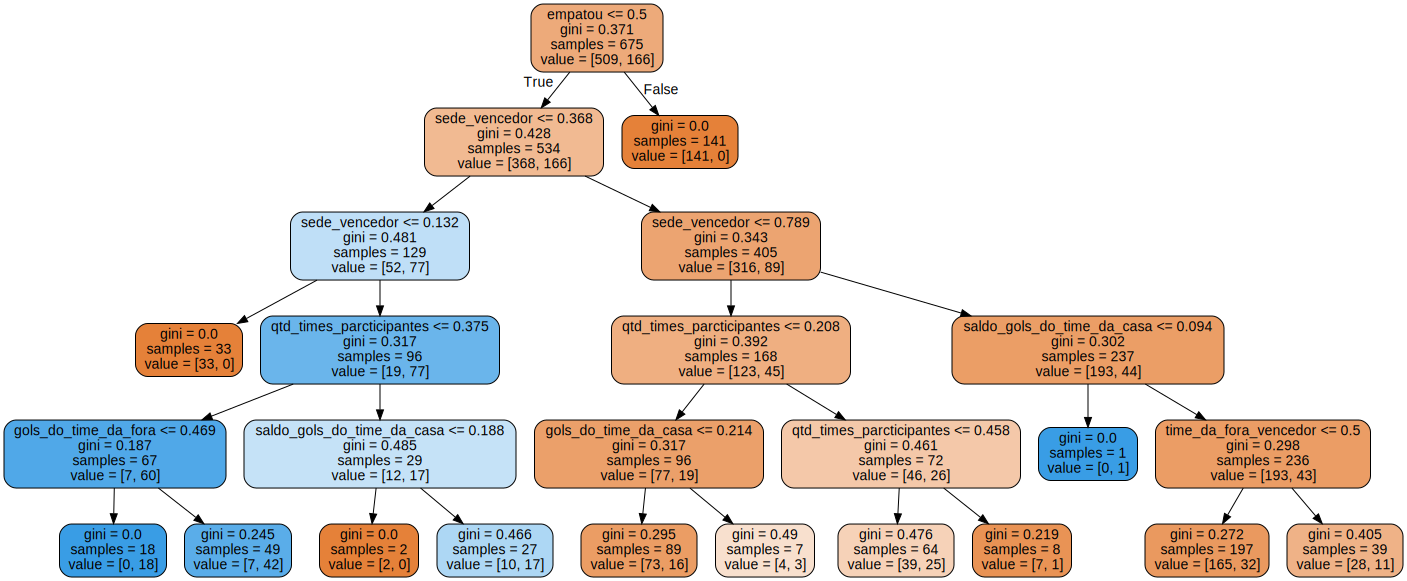

In [269]:
Source.from_file('arvore.png')


In [270]:
#pegando a previsao
dftreeprev= df_DecisionTree.predict(x_teste)
dftreeprev

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0])

In [271]:
report = classification_report (y_teste,dftreeprev )
print (report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       176
           1       0.79      0.45      0.57        49

    accuracy                           0.85       225
   macro avg       0.82      0.71      0.74       225
weighted avg       0.85      0.85      0.84       225



[[170   6]
 [ 27  22]]


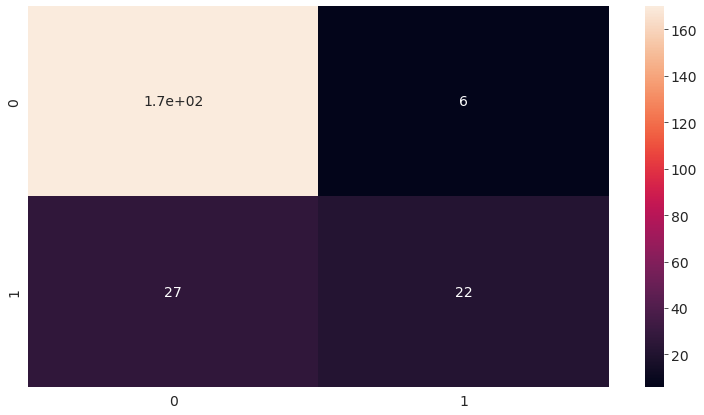

In [272]:
df_Matrix_confusion = confusion_matrix(y_teste,dftreeprev)
print(df_Matrix_confusion)
plt.figure(figsize=(13,7))
sns.heatmap(df_Matrix_confusion,annot= True);

In [ ]:
!pip install dtreeviz

In [273]:
from dtreeviz.trees import dtreeviz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


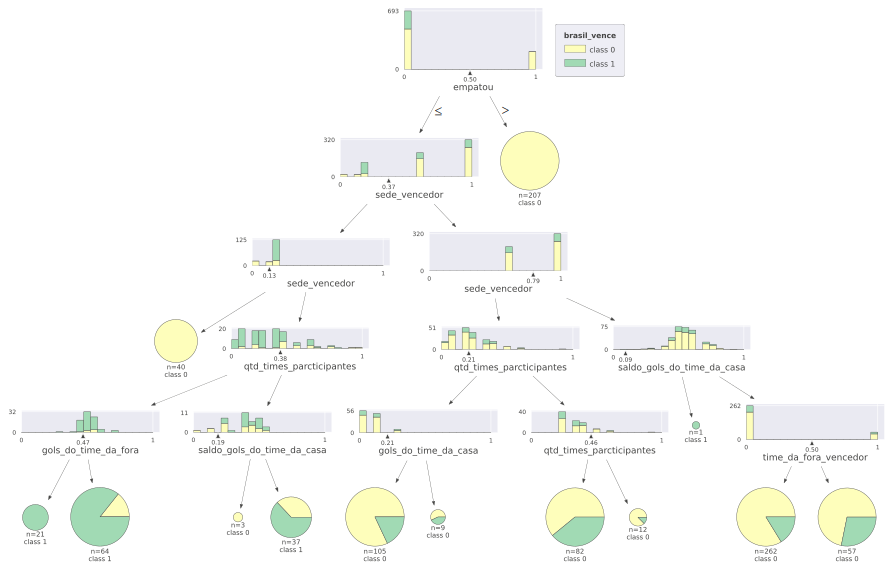

In [274]:
#outro modelo de arvore de decisão mais bonito
viz = dtreeviz(df_DecisionTree, dfwork_x, dfwork_y,
                target_name="brasil_vence",
                feature_names=namecolumns[0:13])
viz


# **2 MODELO - RANDOM FOREST**

In [275]:
#criando treinamento
x_treino , x_teste , y_treino, y_teste =train_test_split(
          dfwork_x,
          dfwork_y,
          test_size =0.25,
          random_state=10
)


In [276]:
#jogando para variavel dfarvore = nossa arvore aleatoria e passamos como parametro n_estimators que seria o numero de ramificações da arvore  conforma a quantidade de caracteristicas aumenta podemos utilziar mais ramificações
dfarvore = RandomForestClassifier (n_estimators =100)


In [277]:
#aplicando o treino com comando fit
dfarvore.fit(x_treino,y_treino)
#previsao
df_prev = dfarvore.predict (x_teste)

[[168   8]
 [ 27  22]]


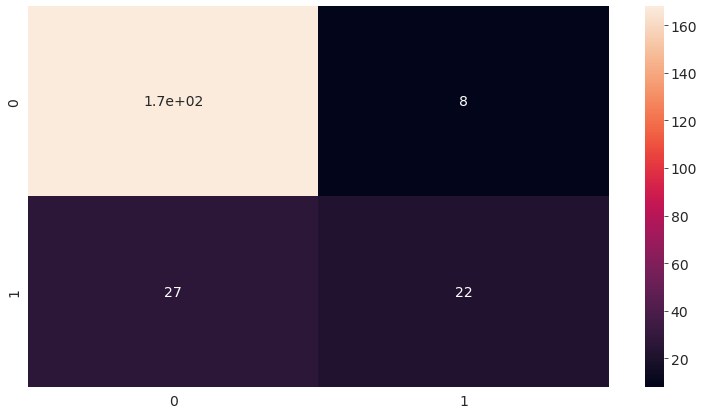

In [278]:
#grafico de matriz de confusão
df_Matrix_confusion = confusion_matrix(y_teste,df_prev)
print(df_Matrix_confusion)

plt.figure(figsize=(13,7))
sns.heatmap(df_Matrix_confusion,annot= True);


In [279]:
report = classification_report (y_teste,df_prev )
print (report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       176
           1       0.73      0.45      0.56        49

    accuracy                           0.84       225
   macro avg       0.80      0.70      0.73       225
weighted avg       0.83      0.84      0.83       225



In [280]:
#FIM